<a href="https://colab.research.google.com/github/zj71/AIAB/blob/main/AIAB_lab_sheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b> Acquired Intelligence & Adaptive Behaviour </b></center></h1>
<h2><center><i>An optimisation algorithm (Lab Sheet 02) </i></center></h2>


**Goal**: In this notebook we will start by implementing a population of hill climbers to solve a resource allocation (or knapsack) problem. We will then contruct the full microbial GA presented in lectures. This will involve designing a suitable fitness function and selection method. You will investigate the effects of hyperparameters such as mutation rate. 



# Knapsack problem

The knapsack (KP) problem is an example of a combinatorial optimization problem, refer to the [wiki](https://en.wikipedia.org/wiki/Knapsack_problem) for a broader overview. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/250px-Knapsack.svg.png" width="200"></center>

It is concerned with a knapsack that has positive integer volume (or capacity) $V$. For instance, the knapsack may be able to store 20 cubic inches. There are $N$ distinct items that may potentially be placed in the knapsack. Item $i$ has a positive integer
volume $Vi$ (e.g this object is 8 cubic inches) and positive integer benefit $Bi$ (e.g how benefical is it to have this object in the knapsack). In the most basic form of the problem we will consider there are only one of each item available (0-1 KP).

The goal is to maximize benefit:

$$
\sum_i^N B_i
$$

Subject to the constraint that:

$$
\big ( \sum_i^N V_i \big) \leq  V
$$

For example suppose we have a knapsack that has a capacity of 20 cubic inches ($V$) and $N=10$ items of different sizes and different benefits. We want to include in the knapsack only these
items that will have the greatest total benefit within the constraint of the knapsack’s capacity.

```
item        a b c d e f g  h i j
Benefit (B) 5 6 1 9 2 8 4  3 7 10
Volume (V)  3 2 4 5 8 9 10 1 6 7
```


# Hill climbing agent
**Background**: Hill climbers may be used to find solutions to a wide variety of problems. Each hill climbing individual increases its fitness through trial and error:

1. Create a random individual
2. Change (mutate) the individual 
3. Measure how good this individual is for some task (fitness)
4. If it's worse than before, keep the original individual. Otherwise, keep the changed individual.
5. Goto 2


Our  algorithms will be composed of four components:

1. **Genotype**: a list of numbers which encode information about task solutions, representing an indvidual
2. **Genotype to phenotype mapping**: How should the genotype be interpreted as encoding a solution to our problem? This is analogous to the development of an organism from birth to adulthood. However, for this current problem, this should turn out to be quite trivial.
3. **Fitness function**: We need a way to evaluate how good each phenotype is as a potential solution to the card-sorting problem. How might this be implemented? 
4. A method for **mutation**. Is it necessary to allow random changes in the offspring produced by reproduction in order to maintain variability. 

> **Task**: Code a single hill climbing individuals to solve the above task. Implement your
algorithm in full and run it for at least 100 generations (i.e. repetitions of the algorithm).
Recording the fitness at each generation. Plot the fitness versus the generation number.
Have you found a solution? Try changing the mutation rate and observe the effects.

**Tips**:
- Code an individual as a single vector, using binary digits (0 or 1) for each gene. Each digit represents whether the corresponding object is being included in the knapsack. Below is an example of how to generate this in python:



* There are several ways in which you can encode the problem itself (the volumes and benefit of each object). It may be useful to store these values as an array:

* The fitness function should return a _single number_ which quantifies how close to the ideal solution a phenotype is. Below is a rough example of what this function should look like:

* Implement your mutation by selecting a random gene (e.g by picking a random number between 1 and 10) and then flipping the number (0 to 1 or 1 to 0). 

* Overwrite the current individual if the new indvidual is better.

**You will need to integrate these features into a loop which performs the genetic algorithm detailed above**.

> **Task**: Code a population of hill climbers that attempt to solve the task in parallel. Plot the fitness of the hillclimbers versus the number of tournaments. How many individuals are successful for each run. Is a population of hill climbers less or more computational expensive? What happens when you make the problem bigger or change the problem.


**Tips**:
- For a population of hill climbers code many individuals in a matrix and keep fitness values in vector:

> **Task**: Demonstrate that a local minima exist. Can you find suboptimal solution that get worse with every mutation but is not the globally optimal solution. It can be helpful to plot fitness over time. 

# Microbial GA

We will implement a steady GA with tournament selection for the knapsack problem. See lecture notes for a full description. You will need:

1. **Population**: a collection of $N$ genotypes. See previous tips for information on how to encode this. 
2. **Genotype - phenotype** mapping (same as before)
3. **A fitness function** same as before, but now needs to return a list of fitness, one for each individual (e.g. length $N$)
4. A **tournament selection** method - how to pick some subset of individuals and select some winners
5. A **mutation operator** 

The Pseudocode is as follows:

1. Initialise random pop $P$
2. Pick 2 individuals at random & evaluate them (in terms of fitness) finding a winner (W) and loser (L) 
3. Replace L with W
4. Add a mutation to W
5. Goto 2

> **Task** Implement the above Pseudocode. Plot the fitness of the best individual versus the number of tournaments. How well does it perform. Run several runs for fixed number of tournaments and plot a bar chart of the average fitness in different conditons.Does it do better than the hillclimber from last week? Whats is the effect of the mutation rate? 

 

# Spatial GA
We will now implement a spatial GA with demes, see lectures. You will to put the population of N individuals on 1D array.

Pseudocode is as follows:
1. Initialise random pop $P$ 
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population array indicate the position on a 1D grid. 
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$ 
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$.
5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L) 
6. Copy W over L and add a mutation (remember to reevaluate the fitness of the loser) 
7. Until success or give up, goto 3 


> **Task** Implement the spatial GA. How do this algorithm compare to the first. Does it evolve quicker? Run several runs for fixed number of tournaments and plot a bar chart of the average fitness in different conditons. Does it get stuck in local minima more or less often? Why?

**Tips:** You can use the same structure as before for the spatial genes:


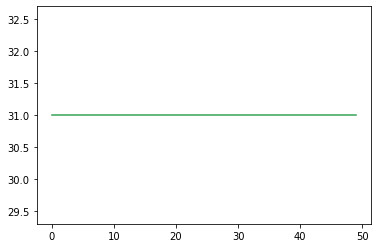

In [ ]:
results=[]
ga(pop,50,value,weight,max_weight,pc,pm,k,results)

plt.plot(results, label = " tournament size",color='#31a354')

# Full microbial GA
We will now implement a spatial GA. You will to put the population of N individuals on 1D array.

Pseudocode is as follows: 
1. Initialise random pop $P$ 
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population matrix indicate the position on a 1D grid. 
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$ 
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$ (start with $k=2$) 5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L) 
6. Copy each gene of the winner W to the L with crossover probability (Pcrossover, say 0.5 to start) 
7. Add a mutation to the L (remember to reevaluate the fitness of the loser) 
8. Until success or give up, goto 3 



> **Task**  Plot the fitness of the best individual versus the number of tournaments. Run several runs for fixed number of tournaments and plot a bar chart of the average fitness in different conditons. How does this algorithm compare to the first two? Does it evolve quicker? Does it get stuck in local minima more or less often. What is the effect of crossover on the speed of evolution?


test

In [ ]:
# Creating the initial population.
def initial_population(maxPop, chrom_length):

    pop = np.random.randint(2, size = (maxPop+1,chrom_length))

    return pop[1:]

# calculation function based on KP problem
def cal_fitness(weight, value, pop, max_weight):

  fitness = np.empty(pop.shape[0])
  for i in range(pop.shape[0]):
      S1 = np.sum(pop[i] * value)
      S2 = np.sum(pop[i] * weight)
      if S2 <= max_weight:
          fitness[i] = S1
      else :
          fitness[i] = 0 

  return fitness.astype(int) 


# tournament selection
def selection(pop, fit_value,k):

    #choose random point
    point=random.randint(0, len(pop)-1-k)
    # Pick individuals for tournament
    fighter1 = point
    fighter2 = random.randint(point+1, point+k)
    
    # Get fitness value for each
    fighter1_fitness = fit_value[fighter1]
    fighter2_fitness = fit_value[fighter2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter1_fitness >= fighter2_fitness:
      winner_index = fighter1
      loser_index = fighter2
    else:
      winner_index = fighter2
      loser_index = fighter1
    
    # Return the winner,loser and index
    return winner_index, loser_index
 
# crossover two parents to create two children
def crossover(winner,loser, pc):
  
  for i in range(len(winner)):
		# check for a crossover
    if np.random.rand() > pc:
			# Copy each gene of the winner W to the L
      loser[i] = winner[i]
      
  return loser
	
# mutation with flipping the number
def mutation(pop, pm):

	for i in range(len(pop)):
		# check for a mutation
		if np.random.rand() < pm:
			# flip the bit
			pop[i] = 1 - pop[i]
  


#found best poppulation and best fitness value
def best(pop, fit_value):

    px = len(pop)
    best_individual = []
    best_fit = fit_value[0]
    for i in range(1, px):
        if(fit_value[i] > best_fit):
            best_fit = fit_value[i]
            best_individual = pop[i]

    return [best_individual, best_fit]

def get_mean(result):
  # mean of fitness
  fit_mean = statistics.mean(result)
  return fit_mean


def get_sem(result):
  #standard error in the mean of fitness
  fit_sem=statistics.stdev(result)/math.sqrt(len(result))
  return fit_sem

def ga(pop,size,value,weight,max_weight,pm,pc,k,results):
  fit_value = cal_fitness(weight, value,pop, max_weight)
  best_individual, best_fit = best(pop, fit_value)

  for generation in range(size):
    #create new pop list
    new_pop=[]
    new_pop=np.copy(pop)

    #selection
    winner_index,loser_index = selection(pop, fit_value,k)  
    '''
    print(winner_index,loser_index)
    print(fit_value[winner_index],fit_value[loser_index])
    '''
    #crossover
    new_loser= crossover(pop[winner_index],pop[loser_index], pc)

    #replace 
    new_pop[loser_index]=new_loser
    pop=new_pop
    
    #mutation
    mutation(pop[loser_index], pm)
    '''
    print(pop)
    print(fit_value)
    '''

    #reevaluate
    fit_value=[]
    fit_value = cal_fitness(weight, value,pop, max_weight)
    best_individual, best_fit = best(pop, fit_value)
    #print(fit_value)

    #add results
    results.append(best_fit)
    

  return results

In [ ]:
#initialize fixed population
chrom_length = 10		# length of chromosome
maxPop  = 50   # number of chromosome
pop = initial_population(maxPop, chrom_length)
pop

array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 1,

In [ ]:
#set parameters
import random
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import math
import statistics


size  = 2000		# size of tournament
#parameters


value=[5, 6, 1, 9, 2, 8, 4, 3, 7, 10]
weight=[3, 2, 4, 5, 8, 9, 10, 1, 6, 7]
max_weight = 20    #Maximum weight that the bag of thief can hold 
pc = 0.5			# crossover probability
pm = 0.05     # mutation rate
k=2    #pick a competitor from the local neighbourhood in the range k


results = []		# store results
fit_value = []		# fitness for each individual

best fitness for 1000 tournament size: [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 

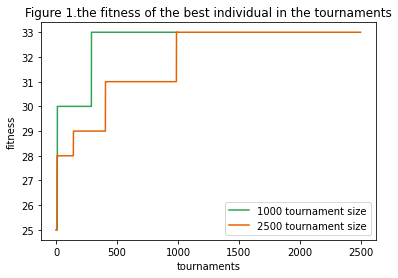

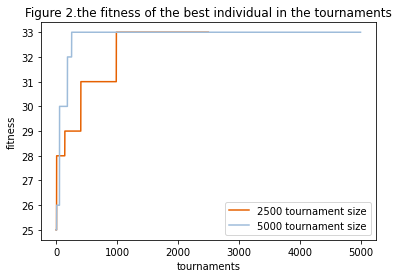

In [ ]:
#      change tournament size       #
results = []
results2 = []
results3 = []
#run Genetic Algorithm
ga(pop,1000,value,weight,max_weight,pc,pm,k,results)
ga(pop,2500,value,weight,max_weight,pc,pm,k,results2)
ga(pop,5000,value,weight,max_weight,pc,pm,k,results3)


print("best fitness for 1000 tournament size:",results)
print("best fitness for 2500 tournament size:",results2)
print("best fitness for 5000 tournament size:",results3)

plt.title('Figure 1.the fitness of the best individual in the tournaments')
plt.xlabel('tournaments')
plt.ylabel('fitness')


plt.plot(results, label = "1000 tournament size",color='#31a354')
plt.plot(results2, label = "2500 tournament size",color='#e66101')

plt.legend(loc='best')
plt.show()

###############################
plt.title('Figure 2.the fitness of the best individual in the tournaments')
plt.xlabel('tournaments')
plt.ylabel('fitness')

plt.plot(results2, label = "2500 tournament size",color='#e66101')
plt.plot(results3, label = "5000 tournament size",color='#9ebcda')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x7f9eec4adf50>,
 [Text(0, 0, '1000'), Text(0, 0, '2500'), Text(0, 0, '5000')])

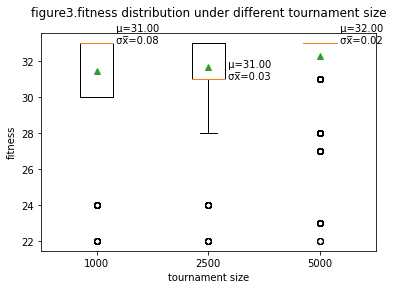

In [ ]:
mean1 = get_mean(results)
mean2 = get_mean(results2)
mean3 = get_mean(results3)

sem1 = get_sem(results)
sem2 = get_sem(results2)
sem3 = get_sem(results3)

data=[results,results2,results3]
means=[mean1,mean2,mean3]
sems=[sem1,sem2,sem3]
# create stacked errorbars:

fig, ax = plt.subplots()

ttl = ax.title
ttl.set_position([.5, 1.05])
ax.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='figure3.fitness distribution under different tournament size',
    xlabel='tournament size',
    ylabel='fitness'
)
bp = ax.boxplot(data, showmeans=True)

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σx̅={:.2f}'.format(means[i], sems[i])
    ax.annotate(text, xy=(x, y))

plt.xticks([1, 2, 3], ['1000', '2500', '5000'])

best fitness for mutation rate 0.01: [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28

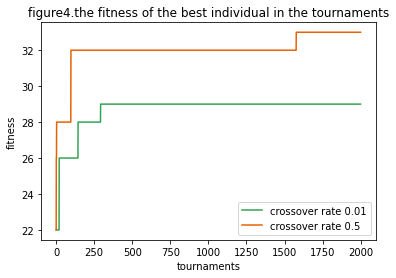

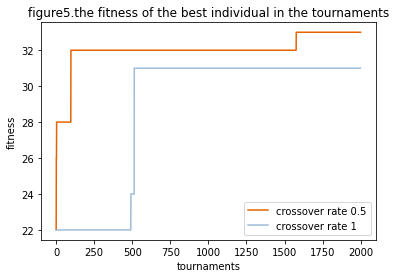

In [ ]:
# change crossover rate #
results = []
results2 = []
results3 = []
#run Genetic Algorithm
ga(pop,size,value,weight,max_weight,0.01,pm,k,results)
ga(pop,size,value,weight,max_weight,0.5,pm,k,results2)
ga(pop,size,value,weight,max_weight,1,pm,k,results3)

print("best fitness for mutation rate 0.01:",results)
print("best fitness for mutation rate 0.5:",results2)
print("best fitness for mutation rate 1:",results3)

plt.title('figure4.the fitness of the best individual in the tournaments')
plt.xlabel('tournaments')
plt.ylabel('fitness')


plt.plot(results, label = "crossover rate 0.01",color='#31a354')
plt.plot(results2, label = "crossover rate 0.5",color='#e66101')

plt.legend(loc='best')
plt.show()

###############################
plt.title('figure5.the fitness of the best individual in the tournaments')
plt.xlabel('tournaments')
plt.ylabel('fitness')

plt.plot(results2, label = "crossover rate 0.5",color='#e66101')
plt.plot(results3, label = "crossover rate 1",color='#9ebcda')
plt.legend(loc='best')
plt.show()

([<matplotlib.axis.XTick at 0x7f9eebfbe5d0>,
 [Text(0, 0, 'crossover rate:0.01'),
  Text(0, 0, 'crossover rate:0.5'),
  Text(0, 0, 'crossover rate:1')])

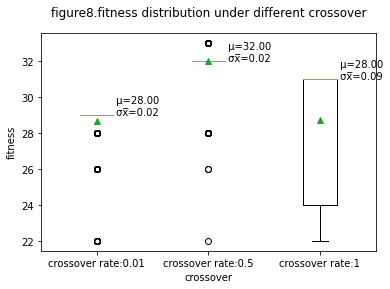

In [ ]:
mean1 = get_mean(results)
mean2 = get_mean(results2)
mean3 = get_mean(results3)

sem1 = get_sem(results)
sem2 = get_sem(results2)
sem3 = get_sem(results3)

data=[results,results2,results3]
means=[mean1,mean2,mean3]
sems=[sem1,sem2,sem3]
# create stacked errorbars:

fig, ax = plt.subplots()

ttl = ax.title
ttl.set_position([.5, 1.05])
ax.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='figure8.fitness distribution under different crossover',
    xlabel='crossover',
    ylabel='fitness',
)
bp = ax.boxplot(data, showmeans=True)

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σx̅={:.2f}'.format(means[i], sems[i])
    ax.annotate(text, xy=(x, y))

plt.xticks([1, 2, 3], ['crossover rate:0.01', 'crossover rate:0.5', 'crossover rate:1'])

In [ ]:
results0 = []
results1 = []
results2 = []
results3 = []
results4 = []
results5 = []
results6 = []
results7 = []
results8 = []
results9 = []
results10 = []
ga(pop,size,value,weight,max_weight,0,pm,k,results0)
ga(pop,size,value,weight,max_weight,0.1,pm,k,results1)
ga(pop,size,value,weight,max_weight,0.2,pm,k,results2)
ga(pop,size,value,weight,max_weight,0.3,pm,k,results3)
ga(pop,size,value,weight,max_weight,0.4,pm,k,results4)
ga(pop,size,value,weight,max_weight,0.5,pm,k,results5)
ga(pop,size,value,weight,max_weight,0.6,pm,k,results6)
ga(pop,size,value,weight,max_weight,0.7,pm,k,results7)
ga(pop,size,value,weight,max_weight,0.8,pm,k,results8)
ga(pop,size,value,weight,max_weight,0.9,pm,k,results9)
ga(pop,size,value,weight,max_weight,1.0,pm,k,results10)

[22,
 22,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,


([<matplotlib.axis.XTick at 0x7f99938b6e90>,
 [Text(0, 0, 'crossover rate:0'),
  Text(0, 0, 'crossover rate:0.1'),
  Text(0, 0, 'crossover rate:0.2'),
  Text(0, 0, 'crossover rate:0.3'),
  Text(0, 0, 'crossover rate:0.4'),
  Text(0, 0, 'crossover rate:0.5'),
  Text(0, 0, 'crossover rate:0.6'),
  Text(0, 0, 'crossover rate:0.7'),
  Text(0, 0, 'crossover rate:0.8'),
  Text(0, 0, 'crossover rate:0.9'),
  Text(0, 0, 'crossover rate:1.0')])

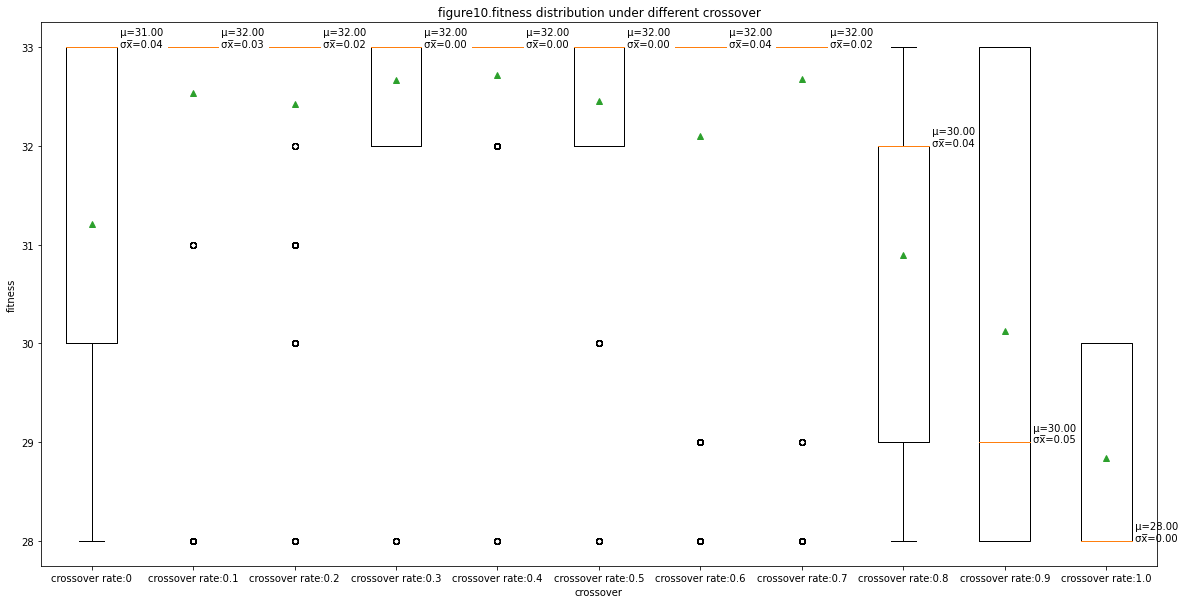

In [ ]:
data=[results0,results1,results2,results3,results4,results5,results6,results7,results8,results9,results10]
means=[get_mean(results0),get_mean(results1),get_mean(results2),get_mean(results3),get_mean(results4),get_mean(results5),get_mean(results6),get_mean(results7),get_mean(results8),get_mean(results9),get_mean(results10)]
sems=[get_sem(results0),get_sem(results1),get_sem(results2),get_sem(results3),get_sem(results4),get_sem(results5),get_sem(results6),get_sem(results7),get_sem(results8),get_sem(results9),get_sem(results10)]
# create box plots:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='figure10.fitness distribution under different crossover',
    xlabel='crossover',
    ylabel='fitness',
)
bp = ax.boxplot(data, showmeans=True)

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σx̅={:.2f}'.format(means[i], sems[i])
    ax.annotate(text, xy=(x, y))


plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['crossover rate:0','crossover rate:0.1','crossover rate:0.2','crossover rate:0.3','crossover rate:0.4','crossover rate:0.5','crossover rate:0.6','crossover rate:0.7','crossover rate:0.8','crossover rate:0.9','crossover rate:1.0'])

best fitness for mutation rate 0.001: [22, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 27, 27, 27, 27, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
best fitness for mutation rate 0.1: [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25]
best fitness for mutation rate 1:: [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]


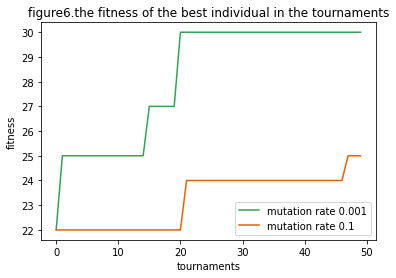

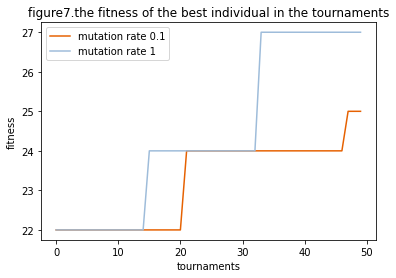

In [ ]:
# change mutation #
results = []
results2 = []
results3 = []
#run Genetic Algorithm
ga(pop,maxPop,value,weight,max_weight,pc,0.001,k,results)
ga(pop,maxPop,value,weight,max_weight,pc,0.1,k,results2)
ga(pop,maxPop,value,weight,max_weight,pc,1,k,results3)

print("best fitness for mutation rate 0.001:",results)
print("best fitness for mutation rate 0.1:",results2)
print("best fitness for mutation rate 1::",results3)

plt.title('figure6.the fitness of the best individual in the tournaments')
plt.xlabel('tournaments')
plt.ylabel('fitness')


plt.plot(results, label = "mutation rate 0.001",color='#31a354')
plt.plot(results2, label = "mutation rate 0.1",color='#e66101')

plt.legend(loc='best')
plt.show()

###############################
plt.title('figure7.the fitness of the best individual in the tournaments')
plt.xlabel('tournaments')
plt.ylabel('fitness')

plt.plot(results2, label = "mutation rate 0.1",color='#e66101')
plt.plot(results3, label = "mutation rate 1",color='#9ebcda')
plt.legend(loc='best')
plt.show()


([<matplotlib.axis.XTick at 0x7f9eebf2ed90>,
 [Text(0, 0, 'mutation rate:0.001'),
  Text(0, 0, 'mutation rate:0.1'),
  Text(0, 0, 'mutation rate:1')])

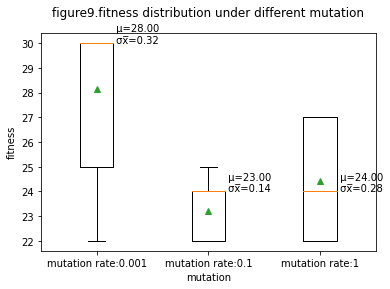

In [ ]:
mean1 = get_mean(results)
mean2 = get_mean(results2)
mean3 = get_mean(results3)

sem1 = get_sem(results)
sem2 = get_sem(results2)
sem3 = get_sem(results3)

data=[results,results2,results3]
means=[mean1,mean2,mean3]
sems=[sem1,sem2,sem3]
# create stacked errorbars:

fig, ax = plt.subplots()

ttl = ax.title
ttl.set_position([.5, 1.05])
ax.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='figure9.fitness distribution under different mutation',
    xlabel='mutation',
    ylabel='fitness',
)
bp = ax.boxplot(data, showmeans=True)

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σx̅={:.2f}'.format(means[i], sems[i])
    ax.annotate(text, xy=(x, y))

plt.xticks([1, 2, 3], ['mutation rate:0.001', 'mutation rate:0.1', 'mutation rate:1'])

In [ ]:
results0 = []
results1 = []
results2 = []
results3 = []
results4 = []
results5 = []
results6 = []
results7 = []
results8 = []
results9 = []
results10 = []
ga(pop,size,value,weight,max_weight,pc,0.001,k,results0)
ga(pop,size,value,weight,max_weight,pc,0.003,k,results1)
ga(pop,size,value,weight,max_weight,pc,0.005,k,results2)
ga(pop,size,value,weight,max_weight,pc,0.007,k,results3)
ga(pop,size,value,weight,max_weight,pc,0.009,k,results4)
ga(pop,size,value,weight,max_weight,pc,0.01,k,results5)
ga(pop,size,value,weight,max_weight,pc,0.03,k,results6)
ga(pop,size,value,weight,max_weight,pc,0.05,k,results7)
ga(pop,size,value,weight,max_weight,pc,0.07,k,results8)
ga(pop,size,value,weight,max_weight,pc,0.09,k,results9)
ga(pop,size,value,weight,max_weight,pc,0.1,k,results10)

[22,
 22,
 22,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,


([<matplotlib.axis.XTick at 0x7f9eebf54dd0>,
 [Text(0, 0, 'mutation rate:0.001'),
  Text(0, 0, 'mutation rate:0.003'),
  Text(0, 0, 'mutation rate:0.005'),
  Text(0, 0, 'mutation rate:0.007'),
  Text(0, 0, 'mutation rate:0.009'),
  Text(0, 0, 'mutation rate:0.01'),
  Text(0, 0, 'mutation rate:0.03'),
  Text(0, 0, 'mutation rate:0.05'),
  Text(0, 0, 'mutation rate:0.07'),
  Text(0, 0, 'mutation rate:0.09'),
  Text(0, 0, 'mutation rate:0.1')])

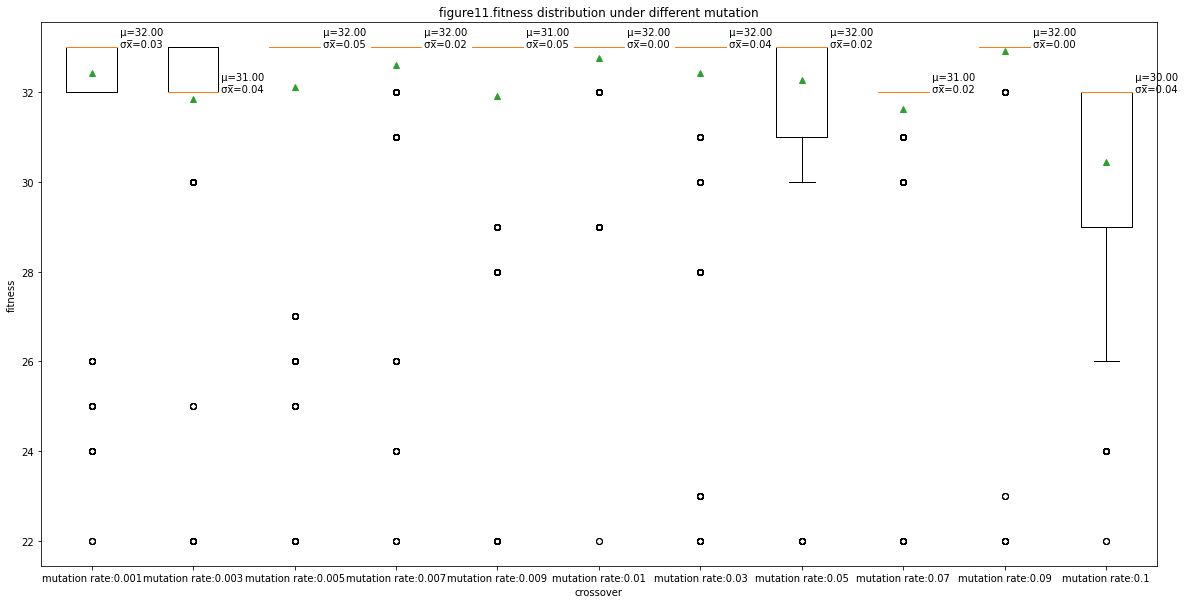

In [ ]:
data=[results0,results1,results2,results3,results4,results5,results6,results7,results8,results9,results10]
means=[get_mean(results0),get_mean(results1),get_mean(results2),get_mean(results3),get_mean(results4),get_mean(results5),get_mean(results6),get_mean(results7),get_mean(results8),get_mean(results9),get_mean(results10)]
sems=[get_sem(results0),get_sem(results1),get_sem(results2),get_sem(results3),get_sem(results4),get_sem(results5),get_sem(results6),get_sem(results7),get_sem(results8),get_sem(results9),get_sem(results10)]
# create box plots:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='figure11.fitness distribution under different mutation',
    xlabel='crossover',
    ylabel='fitness',
)
bp = ax.boxplot(data, showmeans=True)

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σx̅={:.2f}'.format(means[i], sems[i])
    ax.annotate(text, xy=(x, y))


plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['mutation rate:0.001','mutation rate:0.003','mutation rate:0.005','mutation rate:0.007','mutation rate:0.009','mutation rate:0.01','mutation rate:0.03','mutation rate:0.05','mutation rate:0.07','mutation rate:0.09','mutation rate:0.1'])

## extra research


In [ ]:
#initialize fixed population
chrom_length = 10		# length of chromosome
maxPop  = 50   # number of chromosome
pop = initial_population(maxPop, chrom_length)
pop

array([[1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0,

In [ ]:
#set parameters
import random
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import math
import statistics


size  = 2000		# size of tournament
#parameters


value=[5, 6, 1, 9, 2, 8, 4, 3, 7, 10]
weight=[3, 2, 4, 5, 8, 9, 10, 1, 6, 7]
max_weight = 20    #Maximum weight that the bag of thief can hold 
pc = 0.5			# crossover probability
pm = 0.05     # mutation rate
k=2    #pick a competitor from the local neighbourhood in the range k


results = []		# store results
fit_value = []		# fitness for each individual

In [ ]:
results0 = []
results1 = []
results2 = []
results3 = []
results4 = []
results5 = []
results6 = []
results7 = []
results8 = []
results9 = []
results10 = []
ga(pop,size,value,weight,max_weight,0.5,0.001,k,results0)
ga(pop,size,value,weight,max_weight,0.5,0.003,k,results1)
ga(pop,size,value,weight,max_weight,0.5,0.005,k,results2)
ga(pop,size,value,weight,max_weight,0.5,0.007,k,results3)
ga(pop,size,value,weight,max_weight,0.5,0.009,k,results4)
ga(pop,size,value,weight,max_weight,1,0.001,k,results5)
ga(pop,size,value,weight,max_weight,1,0.003,k,results6)
ga(pop,size,value,weight,max_weight,1,0.005,k,results7)
ga(pop,size,value,weight,max_weight,1,0.007,k,results8)
ga(pop,size,value,weight,max_weight,1,0.009,k,results9)

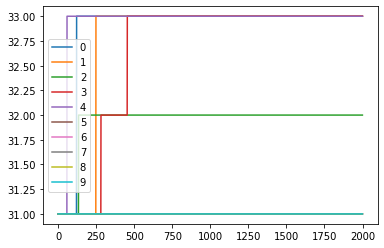

In [ ]:
plt.plot(results0, label = "0")
plt.plot(results1, label = "1")
plt.plot(results2, label = "2")
plt.plot(results3, label = "3")
plt.plot(results4, label = "4")
plt.plot(results5, label = "5")
plt.plot(results6, label = "6")
plt.plot(results7, label = "7")
plt.plot(results8, label = "8")
plt.plot(results9, label = "9")
plt.legend(loc='best')
plt.show()